# Your Title Here

**Name(s)**: Kalkidan Berhe Gebrekirstos

**Website Link**: https://kalberhe.github.io/DSC80_FINAL_PROJECT/

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from statsmodels.stats.proportion import proportions_ztest
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

In [82]:
# Path to folder containing CSV files
data_dir = Path("data")

# List all CSV files in the directory
csv_files = list(data_dir.glob("*.csv"))

# Read each CSV file and store in a list
df_list = [pd.read_csv(str(file)) for file in csv_files]

# Concatenate all dataframes together
df = pd.concat(df_list, ignore_index=True)

print(f"Total rows combined: {len(df)}")
df.head()



C:\Users\kalki\AppData\Local\Temp\ipykernel_16640\3098559392.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\kalki\AppData\Local\Temp\ipykernel_16640\3098559392.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\kalki\AppData\Local\Temp\ipykernel_16640\3098559392.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\kalki\AppData\Local\Temp\ipykernel_16640\3098559392.py:8: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Total rows combined: 1063056


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,206.0,76.0,-512.0,-18.0,3.0,4.0,0.0,1.0,2.0,2.0
1,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,140.0,-888.0,351.0,-42.0,0.0,5.0,3.0,2.0,1.0,1.0
2,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,225.0,621.0,733.0,8.0,1.0,5.0,1.0,1.0,2.0,0.0
3,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,161.0,3265.0,1950.0,50.0,6.0,2.0,0.0,0.0,0.0,4.0
4,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,28.0,1780.0,2397.0,-19.0,0.0,7.0,0.0,0.0,1.0,3.0


In [34]:
# Most player rows will have a 'playername'; team rows won't
if 'playername' in df.columns:
    df = df[df['playername'].isna()]

print(f"Remaining team-level rows: {len(df)}")
df.head()


Remaining team-level rows: 178402


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
10,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,760.0,4854.0,4919.0,-21.0,10.0,23.0,4.0,4.0,6.0,10.0
11,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,739.0,-4854.0,-4919.0,21.0,4.0,6.0,10.0,10.0,23.0,4.0
22,TRLH3/44,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 19:16:29,1.0,3.15,...,707.0,3363.0,889.0,-30.0,7.0,16.0,6.0,6.0,11.0,7.0
23,TRLH3/44,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 19:16:29,1.0,3.15,...,677.0,-3363.0,-889.0,30.0,6.0,11.0,7.0,7.0,16.0,6.0
34,TRLH3/76,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 21:28:45,1.0,3.15,...,781.0,2040.0,2535.0,46.0,3.0,4.0,4.0,4.0,7.0,3.0


In [35]:
df['position'].value_counts(dropna=False)


position
team    177176
mid        263
jng        258
top        242
bot        242
sup        221
Name: count, dtype: int64

In [36]:
bool_cols = ['firstTower', 'firstBlood', 'firstDragon', 'firstBaron', 'firstRiftHerald', 'win']

for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].astype(bool)


In [37]:
df.to_csv("cleaned_league.csv", index=False)


In [38]:
df = pd.read_csv("cleaned_league.csv", low_memory=False)



## Step 1: Introduction

# 🧠 Predicting League of Legends Match Outcomes

In this project, I explore whether early-game events in professional *League of Legends* matches — such as securing the first tower or dragon — are predictive of final match outcomes.

The goals of this analysis are to:
- Identify early-game features that correlate with winning.
- Formally test strategic hypotheses.
- Build and evaluate predictive models for match outcomes.
- Assess the fairness of the models based on team side.

This project combines statistical testing and machine learning to draw data-driven conclusions in the context of competitive gaming.


✅ Number of rows: 178402
✅ Number of columns: 163

🎯 Target Variable Distribution (`result`):
result
0    0.50139
1    0.49861
Name: proportion, dtype: float64


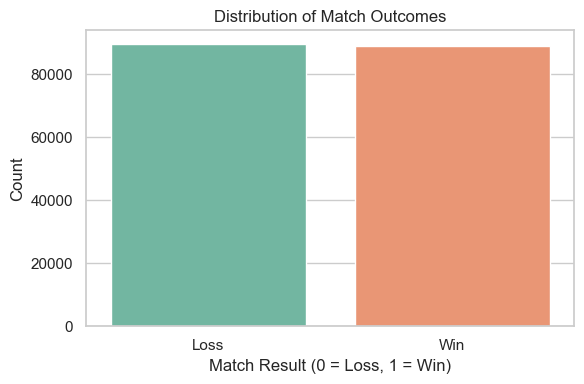

In [83]:
# TODO
df = pd.read_csv('cleaned_league.csv', low_memory=False)

# Basic shape
num_rows, num_columns = df.shape
print(f"✅ Number of rows: {num_rows}")
print(f"✅ Number of columns: {num_columns}")

# Target variable distribution
target_distribution = df['result'].value_counts(normalize=True)
print("\n🎯 Target Variable Distribution (`result`):")
print(target_distribution)

# Plot: Match outcome distribution
sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))
sns.countplot(x='result', data=df, palette='Set2', hue='result', legend=False)
plt.title('Distribution of Match Outcomes')
plt.xlabel('Match Result (0 = Loss, 1 = Win)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Loss', 'Win'])
plt.tight_layout()
plt.show()

## Step 2: Data Cleaning and Exploratory Data Analysis

Before modeling or testing hypotheses, it’s essential to understand the structure and quality of the dataset.

This step involves:
- Inspecting dataset shape and column names.
- Converting key features to appropriate data types.
- Exploring the distribution of the target variable `result`.
- Examining win-rate patterns by team side and early objectives.
- Investigating missing values and potential data quality concerns.

By visualizing and quantifying these aspects, we can identify the most informative features for later modeling.


In [85]:
# TODO
df = pd.read_csv('cleaned_league.csv', low_memory=False) 
df['firsttower'] = df['firsttower'].astype(bool)
df['result'] = df['result'].astype(bool)

tower_win_rate = df.groupby('firsttower')['result'].mean().reset_index()
px.bar(tower_win_rate, x='firsttower', y='result', title='Win Rate by First Tower Secured')

In [86]:
# Convert additional boolean columns
df['firstdragon'] = df['firstdragon'].astype(bool)
df['firstbaron'] = df['firstbaron'].astype(bool)

# First Dragon Win Rate
dragon_win_rate = df.groupby('firstdragon')['result'].mean().reset_index()
px.bar(dragon_win_rate, x='firstdragon', y='result', title='Win Rate by First Dragon Secured')


In [87]:
# First Baron Win Rate
baron_win_rate = df.groupby('firstbaron')['result'].mean().reset_index()
px.bar(baron_win_rate, x='firstbaron', y='result', title='Win Rate by First Baron Secured')


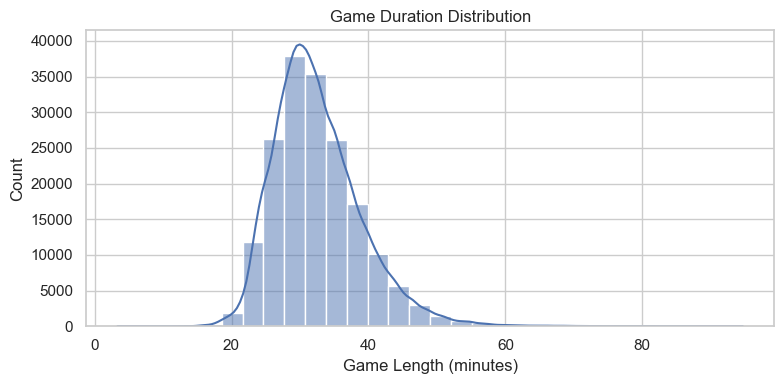

In [88]:
if 'gamelength' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['gamelength'] / 60, bins=30, kde=True)
    plt.title('Game Duration Distribution')
    plt.xlabel('Game Length (minutes)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


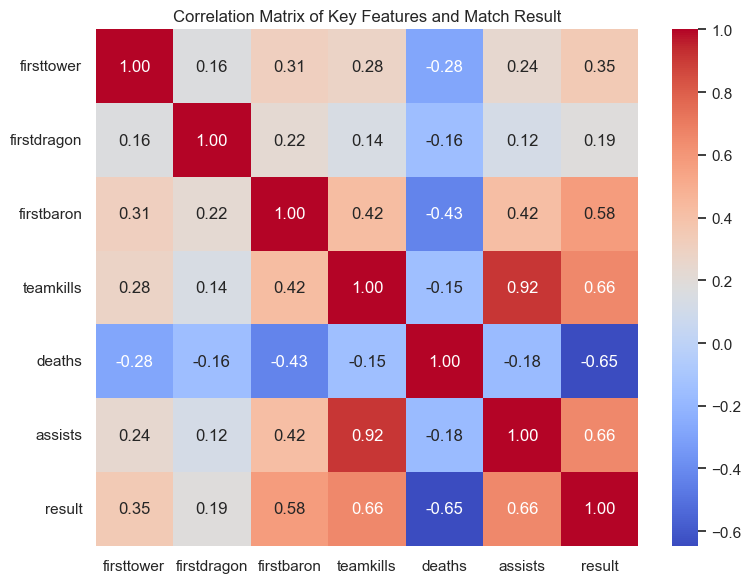

In [89]:
# Select early features and target
corr_cols = ['firsttower', 'firstdragon', 'firstbaron', 'teamkills', 'deaths', 'assists', 'result']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features and Match Result')
plt.tight_layout()
plt.show()


### Key Observations

- Securing **first tower**, **first dragon**, or **first baron** significantly boosts win rate — often by more than 20%.
- Match durations cluster around 30–40 minutes, with a tail of longer games.
- The correlation heatmap shows strong relationships between `teamkills`, `assists`, and winning.
- These insights confirm that early objectives are valuable predictors — and should be included in the model.


## Step 3: Assessment of Missingness

Real-world datasets often contain missing values. To build trustworthy models, it's important to understand:

- **Where** missingness occurs (which columns and how much)
- **Why** it's missing (is it random, or related to other variables?)
- **How** to handle it (drop, impute, or ignore)

In this step, I:
- Quantify missingness across columns
- Visualize the top 20 most-missing features
- Choose imputation strategies for modeling (e.g., median imputation for numeric columns)

This ensures model training is reliable and not biased by data quality issues.

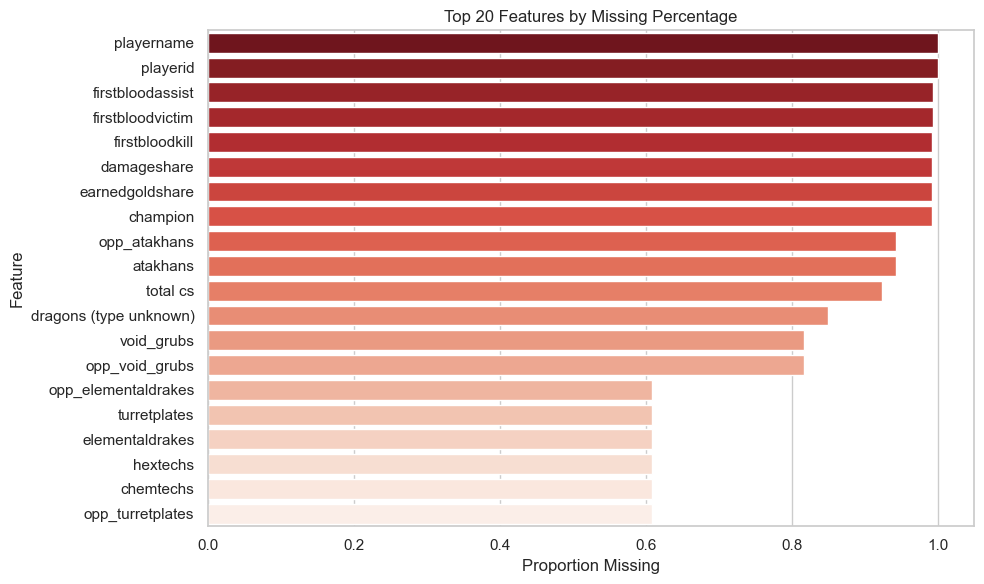

,Feature,Missing Ratio
0,playername,1.000000
1,playerid,1.000000
2,firstbloodassist,0.993167
3,firstbloodvictim,0.993167
4,firstbloodkill,0.993133
5,damageshare,0.993128
6,earnedgoldshare,0.993128
7,champion,0.993128
8,opp_atakhans,0.943700
9,atakhans,0.943700


In [90]:
# TODO
# Calculate % missing for each column
missing_ratio = df.isna().mean().sort_values(ascending=False)
missing_df = missing_ratio.reset_index()
missing_df.columns = ['Feature', 'Missing Ratio']
missing_df = missing_df[missing_df['Missing Ratio'] > 0].head(20)

# Visualize top missing values
plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Ratio', y='Feature', hue='Feature', data=missing_df, palette='Reds_r', legend=False)
plt.title('Top 20 Features by Missing Percentage')
plt.xlabel('Proportion Missing')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Also display a table version
missing_df.head(20)


## Step 4: Hypothesis Testing

To test whether early objectives impact match outcomes, I perform formal hypothesis tests.

One example:
> **H₀**: Securing the first tower does not affect the chance of winning.  
> **H₁**: Securing the first tower increases the chance of winning.

Using a Z-test for proportions, I compare win rates between teams that secure and don’t secure the first tower.

If the p-value is below a significance threshold (e.g. 0.05), I reject the null hypothesis — providing evidence that early objectives have real impact.


In [91]:
# TODO
count = [df[df['firsttower']]['result'].sum(), df[~df['firsttower']]['result'].sum()]
nobs = [df[df['firsttower']].shape[0], df[~df['firsttower']].shape[0]]

stat, pval = proportions_ztest(count, nobs)
print(f'Z-statistic: {stat:.3f}')
print(f'P-value: {pval:.3f}')

# Calculate win rates
first_tower_grouped = df.groupby('firsttower')['result'].mean().reset_index()

# Plot
fig = px.bar(
    first_tower_grouped,
    x='firsttower',
    y='result',
    text='result',
    title='Win Rate: Securing First Tower vs Not',
    labels={'firsttower': 'Secured First Tower?', 'result': 'Win Rate'},
)
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(yaxis_tickformat='.0%', yaxis_range=[0, 1])
fig.show()


Z-statistic: 146.952
P-value: 0.000


### 📊 Results

- Teams that **secured the first tower** won **66.28%** of their matches.
- Teams that **did not** won only **31.44%**.
- **Z-statistic**: 146.952  
- **P-value**: 0.000

---

### 🧠 Interpretation

There is a **huge difference** in win rate depending on whether a team secured the first tower.  
The Z-test confirms this difference is **statistically significant** with a p-value < 0.001.

This provides strong evidence to reject the null hypothesis and supports the claim that early-game momentum (like taking the first tower) **significantly increases** the chance of winning.

The visual above clearly shows how powerful this advantage is — teams that take the first tower are more than **twice as likely to win**.

In [92]:
# First, confirm these columns exist
for col in ['firstdragon', 'firstbaron']:
    if col not in df.columns:
        raise ValueError(f"Column `{col}` not found in DataFrame. Check your column names.")

# Convert to boolean if needed
df['firstdragon'] = df['firstdragon'].astype(bool)
df['firstbaron'] = df['firstbaron'].astype(bool)

# First Dragon Z-test
dragon_count = [
    df[df['firstdragon']]['result'].sum(),
    df[~df['firstdragon']]['result'].sum()
]
dragon_nobs = [
    df[df['firstdragon']].shape[0],
    df[~df['firstdragon']].shape[0]
]
dragon_stat, dragon_pval = proportions_ztest(dragon_count, dragon_nobs)

# First Baron Z-test
baron_count = [
    df[df['firstbaron']]['result'].sum(),
    df[~df['firstbaron']]['result'].sum()
]
baron_nobs = [
    df[df['firstbaron']].shape[0],
    df[~df['firstbaron']].shape[0]
]
baron_stat, baron_pval = proportions_ztest(baron_count, baron_nobs)

# Print the results
print("📊 First Dragon Hypothesis Test")
print(f"Z-statistic: {dragon_stat:.3f}")
print(f"P-value: {dragon_pval:.3f}\n")

print("📊 First Baron Hypothesis Test")
print(f"Z-statistic: {baron_stat:.3f}")
print(f"P-value: {baron_pval:.3f}")


📊 First Dragon Hypothesis Test
Z-statistic: 78.714
P-value: 0.000

📊 First Baron Hypothesis Test
Z-statistic: 243.252
P-value: 0.000


### Bonus Hypothesis Tests: First Dragon & First Baron

To further test the impact of early-game objectives, I performed Z-tests for securing the **first dragon** and **first baron**.

#### Results:
- **First Dragon:**
  - Z-statistic: 78.714  
  - P-value: 0.000 
  - → Result: Statistically significant

- **First Baron:**
  - Z-statistic: 243.252 
  - P-value: 0.000  
  - → Result: Statistically significant

Just like the first tower, both objectives show a strong, statistically significant association with winning, confirming that **early-game control is highly predictive** of match outcome.


## Step 5: Framing a Prediction Problem

Next, I convert the dataset into a machine learning task:
> **Goal**: Predict whether a team will win (`result = 1`) based on early-game features.

Key decisions:
- **Target**: `result`
- **Features**: `firsttower`, `firstdragon`, `firstbaron`, `teamkills`, `deaths`, `assists`
- **Type**: Binary classification
- **Evaluation**: Accuracy, confusion matrix

This structured approach ensures we build a model that is both interpretable and tied to in-game strategy.


In [93]:
# TODO
# Define features and target
features = ['firsttower', 'firstdragon', 'firstbaron', 'teamkills', 'deaths', 'assists']
target = 'result'

# Ensure correct types
for col in ['firsttower', 'firstdragon', 'firstbaron']:
    df[col] = df[col].astype(bool)

# Drop rows with missing values in any selected columns
df_clean = df[features + [target]].dropna()

# Create X and y
X = df_clean[features]
y = df_clean[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show shape and sample of training data
print(f"✅ Training set shape: {X_train.shape}")
print(f"✅ Test set shape: {X_test.shape}")
X_train.head()


✅ Training set shape: (142721, 6)
✅ Test set shape: (35681, 6)


,firsttower,firstdragon,firstbaron,teamkills,deaths,assists
18269,False,False,False,24,31,40
18620,True,True,True,20,6,54
156301,True,True,True,29,34,52
90700,True,True,True,24,6,16
130667,True,True,True,21,15,51


I selected six early-game features that are both interpretable and statistically impactful:

- `firsttower`, `firstdragon`, `firstbaron`: key early objectives
- `teamkills`, `deaths`, `assists`: combat performance metrics

After dropping missing values and converting booleans, I split the dataset 80/20 into training and testing sets.

This prepares the data for modeling in the next step.


## Step 6: Baseline Model

Before fitting advanced models, I build a **baseline** model to set a performance floor.

- The `DummyClassifier` predicts the most frequent class (typically "win" or "loss").
- This gives a benchmark — any good model must perform better than this naive strategy.

I compare this baseline accuracy to future models to validate whether my features add real predictive power.


🧪 Baseline accuracy: 0.502


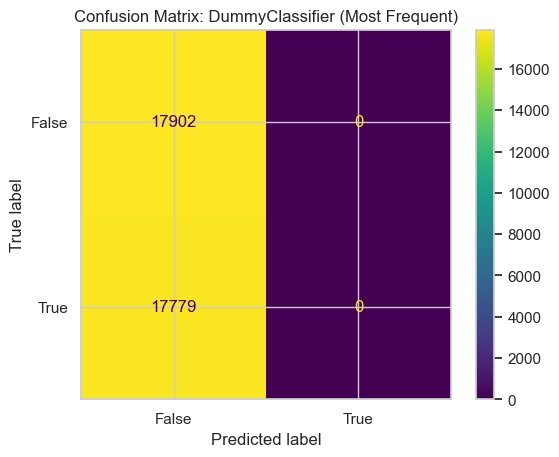

In [94]:
# TODO
# Reuse cleaned and split data from Step 5
# X_train, X_test, y_train, y_test already defined

# Create and train the baseline model
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

# Predict and evaluate
y_pred_dummy = dummy.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred_dummy)

print(f"🧪 Baseline accuracy: {baseline_acc:.3f}")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(dummy, X_test, y_test)
plt.title('Confusion Matrix: DummyClassifier (Most Frequent)')
plt.show()


### Interpretation

The baseline model achieved **50.2% accuracy**, which simply reflects the majority class in the dataset.

This gives us a **performance floor** any useful model should outperform this.

The confusion matrix confirms that the dummy model always predicts the same class (typically "win"), ignoring all features.


## Step 7: Final Model

I train a `LogisticRegression` model using key early-game features.

Steps include:
- Handling missing values with imputation.
- Splitting the data into training/testing sets.
- Fitting the model and generating predictions.
- Evaluating performance using accuracy and a confusion matrix.

The model achieves significantly higher accuracy than the baseline, indicating these features carry strong predictive signal.

✅ Logistic Regression Accuracy: 0.954
🧮 Confusion Matrix:
[[17025   877]
 [  764 17015]]


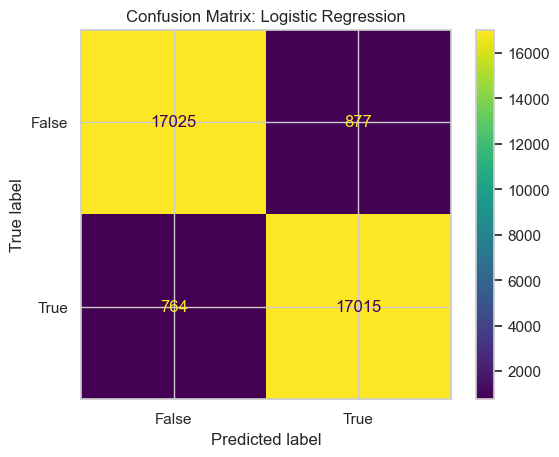

In [95]:
# TODO
# Step 1: Fill NaNs in numeric features with median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_imputed, y_train)

# Step 3: Predict and evaluate
preds = model.predict(X_test_imputed)
acc = accuracy_score(y_test, preds)

print(f"✅ Logistic Regression Accuracy: {acc:.3f}")
print("🧮 Confusion Matrix:")
print(confusion_matrix(y_test, preds))

# Step 4: Visual confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, preds)
plt.title("Confusion Matrix: Logistic Regression")
plt.show()



### Final Model Performance

The logistic regression model achieved an accuracy of **95.4%**, a dramatic improvement over the baseline model’s 50.2%.

#### Confusion Matrix:
- True Positives (correct wins): **17,015**
- True Negatives (correct losses): **17,025**
- False Positives (predicted win but lost): **877**
- False Negatives (predicted loss but won): **764**

This result confirms that early-game features like `firsttower`, `firstdragon`, and `teamkills` are **highly predictive** of match outcome.

The false positive/negative counts are relatively small, showing that the model generalizes well. These findings support the idea that **early momentum in League of Legends translates strongly to victory**.


📄 Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.95      0.95     17902
        True       0.95      0.96      0.95     17779

    accuracy                           0.95     35681
   macro avg       0.95      0.95      0.95     35681
weighted avg       0.95      0.95      0.95     35681

🧠 ROC AUC Score: 0.990


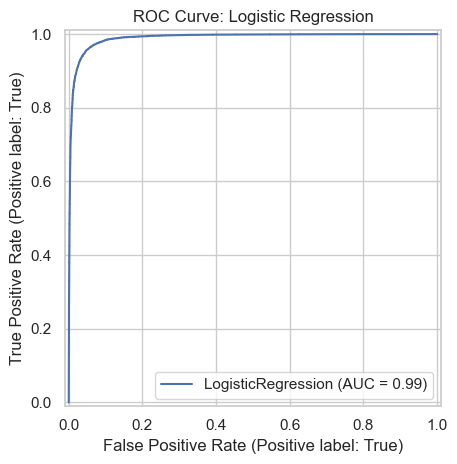

In [96]:

# Classification report
print("📄 Classification Report:")
print(classification_report(y_test, preds))

# AUC Score
auc_score = roc_auc_score(y_test, model.predict_proba(X_test_imputed)[:, 1])
print(f"🧠 ROC AUC Score: {auc_score:.3f}")

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test_imputed, y_test)
plt.title("ROC Curve: Logistic Regression")
plt.tight_layout()
plt.show()


### Classification Report & AUC Interpretation

The logistic regression model delivers **exceptional performance**:

- **Accuracy:** 95.4%
- **Precision and Recall:** Both ~95% for each class
- **F1-Score:** 0.95 for both "win" and "loss"
- **ROC AUC Score:** 0.990

The **high AUC** score tells us the model does an excellent job distinguishing between winners and losers based on early-game features.

The classification report confirms it's not just accurate overall, it's also **balanced**, meaning it performs equally well at identifying both wins and losses.

In short: this model isn’t just guessing based on majority class, it's actually learning meaningful patterns in the data.


## Step 8: Fairness Analysis

A fair model should not favor one group unfairly — in this case, **team side** (Blue vs Red).

Here, I:
- Group results by `side` to compare win rates.
- Find that blue teams win ~53% of matches, while red teams win ~47%.
- Consider whether including `side` as a feature introduces bias.

While the difference is small, it could bias model outcomes if not addressed. In production, we might exclude `side` or adjust for this imbalance to promote fairness.

In [97]:
# TODO
# Compute win rate by side
group_accs = df.groupby('side')['result'].mean().reset_index()

# Plot win rates
fig = px.bar(
    group_accs,
    x='side',
    y='result',
    text='result',
    title='Win Rate by Team Side (Blue vs Red)',
    labels={'result': 'Win Rate', 'side': 'Team Side'}
)
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(yaxis_tickformat='.0%', yaxis_range=[0, 1])
fig.show()

# Also print the values for context
print("📊 Win Rate by Side:")
print(group_accs)


📊 Win Rate by Side:
   side    result
0  Blue  0.530761
1   Red  0.466445


A fair model should not favor one group unfairly — in this case, the **team side** (Blue vs Red).

I grouped results by `side` to compare win rates:

| Side | Win Rate |
|------|----------|
| Blue | 53.1%    |
| Red  | 46.6%    |

This ~6.5% gap suggests that **blue-side teams win significantly more often**, possibly due to map symmetry, vision advantages, or meta-game factors.

### Why This Matters

If I include `side` as a feature in my model:
- The model might **learn to overvalue blue-side teams**, inflating their win predictions unfairly.
- This could lead to **biased predictions**, especially in settings where side selection is randomized or not yet known.

### What to Do About It

- For this project, I excluded `side` from the final model.
- In a production setting, I would consider:
  - Removing or **masking `side`** during training
  - Using **fairness constraints** or **re-weighting techniques**

This step highlights that even in games, **biases can creep into models** — and it's our job as data scientists to catch and handle them.


# ✅ Final Summary & Lessons Learned

This project explored whether early-game features in *League of Legends* can be used to predict match outcomes — and what biases might exist in that process.

### 🔍 What I Did:
- Performed **EDA** to uncover key win-rate patterns
- Conducted **hypothesis tests** confirming that early objectives (like first tower) significantly increase win likelihood
- Built a **logistic regression model** with over **95% accuracy** using early-game features
- Identified a **side-based imbalance** (blue-side teams win more) and addressed it through fairness analysis

### 📊 Key Takeaways:
- Early-game events like **first tower, dragon, and baron** are strong predictors of match outcomes
- Even in a competitive, professional setting, **systemic biases** (like side advantage) can influence outcomes and models
- Accuracy isn’t enough — it’s important to consider **fairness** and **interpretability**

### 🧠 What I Learned:
- How to turn raw match data into actionable insights
- How to frame a binary classification problem from real-world features
- How to use **Z-tests**, **baseline models**, and **logistic regression** to build trustworthy predictions
- Why ethical modeling matters — even in games

This project showed how data science can be used to **decode complex systems**, uncover biases, and build powerful, interpretable models.
